In [2]:
# changing working directory
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Github/ML/TrojanGuard/code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Github/ML/TrojanGuard/code


In [1]:
# for saving changes to github
%cd ..
!git config --global user.email  "abdosalm555@gmail.com"
!git config --global user.name "abdosalem490"
!git add .
!git commit -am "[UPDATE]: added google colab cells"
!git push
%cd code

/
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
[Errno 2] No such file or directory: 'code'
/


In [2]:
# add the needed imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import joblib
from sklearn.metrics import confusion_matrix
import pickle
import sys

In [3]:
# read the dataset
df = pd.read_csv("Trojan_Detection_dataset.csv")

# remove leading and trailing whitespaces from column names
df = df.rename(columns=lambda x: x.strip())

# list of protocol name where every index represents the protocol number
# protocol_names = ["HOPOPT", "ICMP", "IGMP", "GGP", "IPv4", "ST", "TCP", "CBT", "EGP", "IGP", "BBN-RCC-MON", "NVP-II", "PUP", "ARGUS (deprecated)", "EMCON", "XNET", "CHAOS", "UDP"]

# column_descriptions = {
#     "record_id": "represents the id of the record",
#     "Flow ID": "written as <source/destination ip> - <source/destination ip> - <destination/source port> - <destination/source port> - <protocol>.",
#     "Source IP": "IP address of source",
#     "Source Port": "Port number of source",
#     "Destination IP": "IP address of destination",
#     "Destination Port": "Port number of destination",
#     "Protocol": "name protocol used, refer to @protocol_names list",
#     "Timestamp": "digital record of the date and time when the frame transmitted",
#     "Flow Duration": "the time elapsed between receiving the first and last packets in the flow",
#     "Total Fwd Packets": ""
# }


# remove Timestamp, Flow ID, Class and record_id columns
labels = df['Class']
df = df.drop(columns=['Timestamp', 'Flow ID', 'Class', 'record_id'])


In [4]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
df.describe()
# df["Flow Duration"].describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,177482.000000,177482.000000,177482.000000,1.774820e+05,177482.000000,177482.000000,177482.000000,1.774820e+05,177482.000000,177482.000000,...,177482.000000,177482.000000,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05
mean,38633.298729,5763.328969,8.295917,1.163310e+07,6.743929,9.908261,811.919496,1.023884e+04,230.168969,13.323571,...,1.673894,27.802025,1.421356e+05,2.047529e+04,1.617342e+05,1.264388e+05,4.540725e+06,4.024527e+05,4.894188e+06,4.234695e+06
std,18435.832044,15155.981517,4.540501,2.302798e+07,29.655515,106.401351,6055.745405,1.517666e+05,392.025958,67.749335,...,6.848561,6.652046,7.798898e+05,2.469821e+05,8.791481e+05,7.506803e+05,1.542957e+07,3.246955e+06,1.627581e+07,1.504980e+07
min,0.000000,0.000000,0.000000,2.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,34156.000000,80.000000,6.000000,4.690050e+04,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,43105.500000,443.000000,6.000000,4.854025e+05,2.000000,1.000000,31.000000,3.100000e+01,31.000000,0.000000,...,0.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,52135.000000,443.000000,6.000000,1.062035e+07,5.000000,4.000000,451.000000,4.950000e+02,355.000000,21.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65530.000000,65267.000000,17.000000,1.199991e+08,4502.000000,12951.000000,846614.000000,1.868497e+07,1460.000000,1460.000000,...,586.000000,60.000000,3.059421e+07,1.993857e+07,4.902243e+07,3.059421e+07,1.197736e+08,7.445182e+07,1.197736e+08,1.197736e+08


In [ ]:
# prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177482 entries, 0 to 177481
Data columns (total 82 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Source IP                    177482 non-null  object 
 1   Source Port                  177482 non-null  int64  
 2   Destination IP               177482 non-null  object 
 3   Destination Port             177482 non-null  int64  
 4   Protocol                     177482 non-null  int64  
 5   Flow Duration                177482 non-null  int64  
 6   Total Fwd Packets            177482 non-null  int64  
 7   Total Backward Packets       177482 non-null  int64  
 8   Total Length of Fwd Packets  177482 non-null  int64  
 9   Total Length of Bwd Packets  177482 non-null  int64  
 10  Fwd Packet Length Max        177482 non-null  int64  
 11  Fwd Packet Length Min        177482 non-null  int64  
 12  Fwd Packet Length Mean       177482 non-null  float64
 13 

In [5]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Source IP,10.42.0.42,10.42.0.42,10.42.0.42,10.42.0.42,10.42.0.151,10.42.0.211,10.42.0.42,10.42.0.42,10.42.0.42,172.217.10.1
Source Port,49975,49169,37749,41352,44353,6021,38871,49387,34743,443
Destination IP,121.14.255.84,172.217.6.226,10.42.0.1,10.42.0.1,107.22.241.77,10.42.0.1,74.217.63.24,66.231.239.96,10.42.0.1,10.42.0.151
Destination Port,80,443,53,53,443,53,443,443,53,51786
Protocol,6,17,17,17,6,17,6,6,17,6
...,...,...,...,...,...,...,...,...,...,...
Active Min,0,0,0,0,322594,0,0,0,0,0
Idle Mean,0.0,0.0,0.0,0.0,60306983.0,0.0,0.0,0.0,0.0,0.0
Idle Std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Idle Max,0,0,0,0,60306983,0,0,0,0,0


<Figure size 640x480 with 0 Axes>

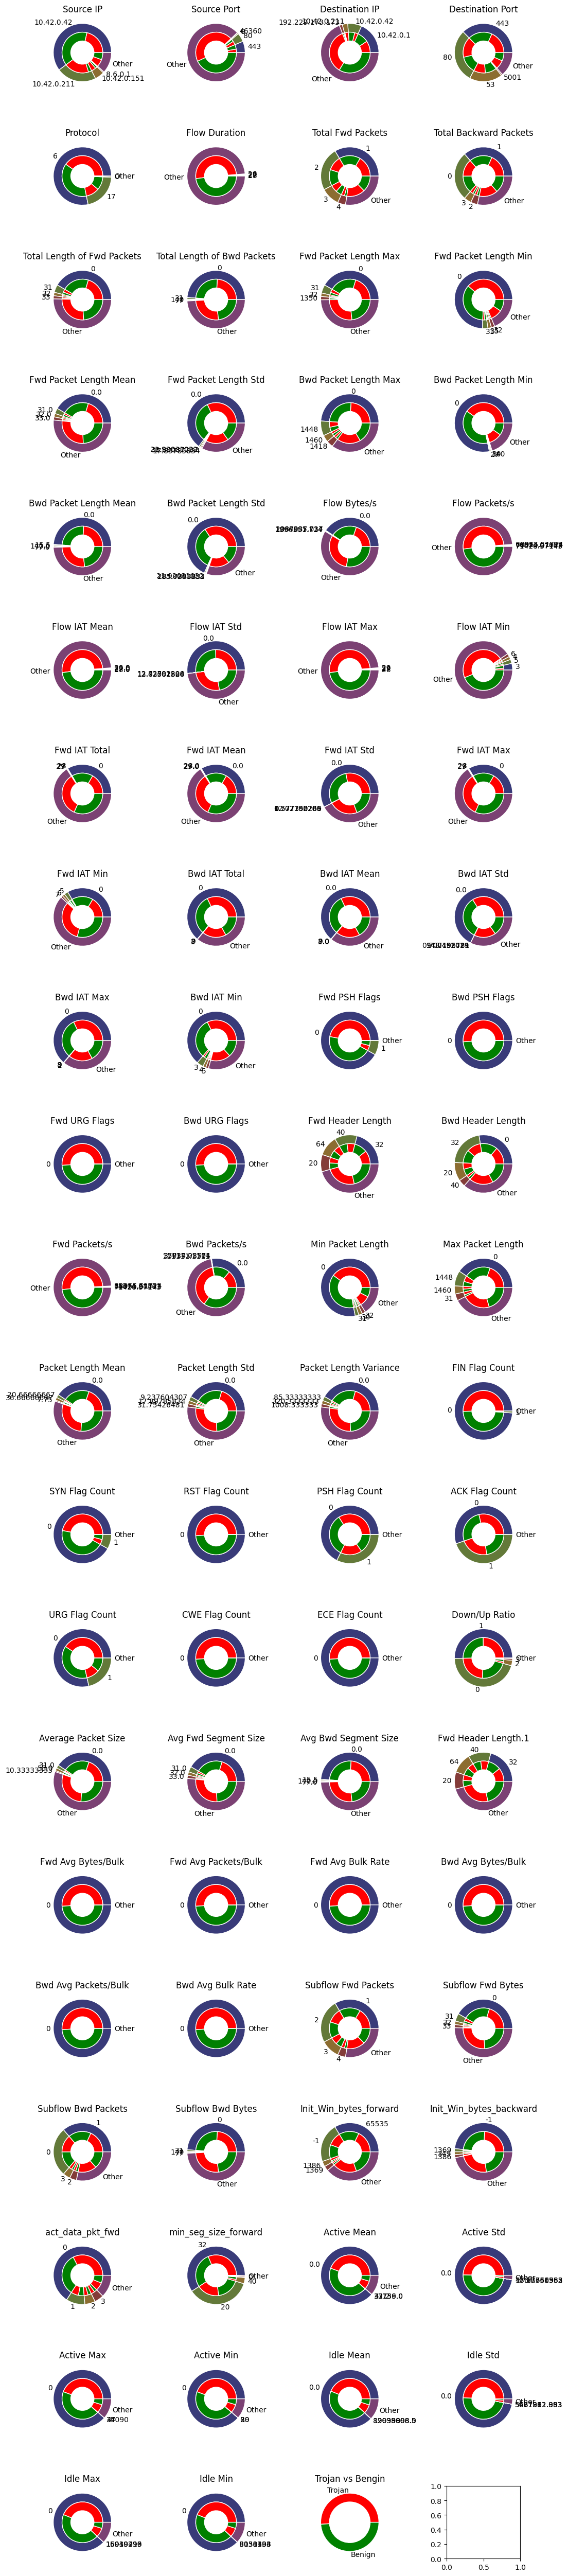

In [6]:
# get the total number of Trojan and benign classes
Trojan_total = labels.value_counts()[0]
Benign_total = labels.value_counts()[1]

# visualize features in pie chart manner
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
fig, ax = plt.subplots(21, 4, figsize=(10,50))
fig.tight_layout(h_pad=5, w_pad=5)

j = 0
for series_name, series in df.items():

#     print(f"{j//4}, {j%4}, {series_name}")

    # to handle the case when the number of unique values are less than 5
    largest_n_num = 4
    if len(series.value_counts()) <= largest_n_num:
        largest_n_num = len(series.value_counts())

    # get the largest IP addresses (default = 4)
    largest_4 = series.value_counts().nlargest(largest_n_num)
    # add fifth element which represents the other IP address
    largest_4.loc['Other'] = len(series)-sum(largest_4.values)

    # plot 4 biggest values for each feature and how much every class resemble this feature
    cmap = plt.colormaps["tab20b"]
    outer_colors = cmap(np.arange(5)*4)
    inner_colors = cmap([1, 2, 5, 6, 9, 10, 14, 15, 18, 19])

    # count number of Trojans and Benigns for each value of the current feature
    vals = []
    Trojan_list = []
    Benign_list = []

    for i in range(0, largest_n_num):
        torjan_c = len(df.loc[(series==largest_4.index[i]) & (labels=="Trojan")])
        benign_c = len(df.loc[(series==largest_4.index[i]) & (labels=="Benign")])
        Trojan_list.append(torjan_c)
        Benign_list.append(benign_c)
        vals.append(torjan_c)
        vals.append(benign_c)


    # add the value for the others
    others_trojan = Trojan_total-sum(Trojan_list)
    others_benign = Benign_total-sum(Benign_list)
    vals.append(others_trojan)
    vals.append(others_benign)



    ax[j//4][j%4].set_title(series_name)
    ax[j//4][j%4].pie(largest_4.values, labels=largest_4.index, radius=1, colors=outer_colors,
           wedgeprops=dict(width=0.3, edgecolor='w'))

    # green is not trojan, red is trojan
    ax[j//4][j%4].pie(vals, radius=0.7, colors=["red", "green"],
           wedgeprops=dict(width=0.3, edgecolor='w'))

    # move to the next cell
    j += 1

# plot number of benign against trojan
ax[j//4][j%4].set_title("Trojan vs Bengin")
ax[j//4][j%4].pie(labels.value_counts().values, labels=labels.value_counts().index, radius=1, colors=["red", "green"],
       wedgeprops=dict(width=0.3, edgecolor='w'))

plt.show()



In [ ]:
Trojan_data = df[labels=="Trojan"]
Benign_data = df[labels=="Benign"]
# sns.histplot(Trojan_data[:, 1])

fig, ax = plt.subplots(82, 2, figsize=(10,5))
i = 0
for series_name, series in Trojan_data.items():
  sns.histplot(Trojan_data[series_name], stat="percent", kde=True, ax=ax[i][0]).set_title("Trojan")
  sns.histplot(Benign_data[series_name], stat="percent", kde=True, ax=ax[i][1]).set_title("Benign")
  print(i)
  i += 1


0
1
2
3
4
5
6
7
8


In [ ]:
print(len(df[labels=="Trojan"]))
print(len(df[labels=="Benign"]))
df[labels=="Trojan"]

90683
86799


,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,10.42.0.42,49975,121.14.255.84,80,6,10743584,4,4,372,672,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,10.42.0.42,49169,172.217.6.226,443,17,254217,6,7,3191,5246,...,5,20,0.0,0.0,0,0,0.0,0.0,0,0
3,10.42.0.42,41352,10.42.0.1,53,17,286483,1,1,40,106,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
5,10.42.0.211,6021,10.42.0.1,53,17,251336,1,1,37,182,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
6,10.42.0.42,38871,74.217.63.24,443,6,3096,3,0,0,0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177474,172.217.12.174,80,10.42.0.42,50150,6,104600,1,1,0,0,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
177477,10.42.0.42,60811,64.71.142.96,80,6,40648037,2,0,0,0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
177478,10.42.0.42,33004,54.192.36.60,80,6,2037177,2,0,0,0,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
177479,10.42.0.42,51049,172.217.9.232,443,6,397316,9,7,867,4439,...,3,32,0.0,0.0,0,0,0.0,0.0,0,0


In [ ]:
# convert IP address into a number from the format(A.B.C.D) to (AAABBBCCCDDD)
def convertIP(IP_addr):
    IP_list = [int(x) for x in IP_addr.split(".")]
    IP_num = sum([x * (10**(3*(3-i))) for i, x in enumerate(IP_list)])
    return IP_num

# apply the conversion
df['Source IP'] = df['Source IP'].apply(convertIP)
df['Destination IP'] = df['Destination IP'].apply(convertIP)

df.head(5)

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,10042000042,49975,121014255084,80,6,10743584,4,4,372,672,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,10042000042,49169,172217006226,443,17,254217,6,7,3191,5246,...,5,20,0.0,0.0,0,0,0.0,0.0,0,0
2,10042000042,37749,10042000001,53,17,1023244,1,1,30,179,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
3,10042000042,41352,10042000001,53,17,286483,1,1,40,106,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,10042000151,44353,107022241077,443,6,65633087,12,10,767,5622,...,3,32,322594.0,0.0,322594,322594,60306983.0,0.0,60306983,60306983


In [ ]:
# split the dataset into 75% training, 25% valdiation

# get the training data
X_train, X_test, Y_train, Y_test = train_test_split(df, labels, test_size=0.25, random_state=121, shuffle=True, stratify=labels)

# standardScalar to make all features standard

# get the validation and test data
# X_validate, X_test, Y_validate, Y_test = train_test_split(X_temp, Y_temp, test_size=0.33, random_state=121, shuffle=True, stratify=Y_temp)

# Note: stratify keeps the proportion of labels same for the result train and test data

In [ ]:
# TODO: standardScalar to make all features standard
# TODO: detect and eliminate outliers
# TODO: visualize feature correlation matrix
# TODO: confusion matrix
# TODO: boxplots, Z-score, scatterplot, histogram

In [ ]:
# use zeroR, SVM, logistic regression, Adaboost

# ZeroR classifier

# ZeroR uses Zero Features to predict, what is does is just get the most frequent class in the dataset and then predict any
# test point to be that most frequent class
class ZeroR():

    def __init__(self):
        pass

    # get the most frequent class
    # class list is a dictionary where they key is the class and value is the frequency of the class in the dataset
    def fit(self, X_features, Y_labels):
        self.model_Predicted = Counter(Y_labels).most_common(1)[0][0]
        print(Counter(Y_labels).most_common(2))

    # just return the most frequent class
    def predict(self, test):
        return self.model_Predicted

    # get the score of correctly predicting the classes
    def score(self, X_test, Y_test):
        return len(Y_test[Y_test == self.model_Predicted]) / len(Y_test)

zeroR = ZeroR()
zeroR.fit(X_train, Y_train)
print(zeroR.score(X_validate, Y_validate))
print(zeroR.score(X_train, Y_train))

# print(zeroR.predict(13321))
# print(Trojan_total)
# print(Benign_total)

[('Trojan', 63478), ('Benign', 60759)]
0.5109323316701239
0.5109427948195787


In [ ]:
# logistic regression classifier

#
class Logistic_Regression():

    def __init__(self):
        # penalty:            Specify the norm of the penalty (regularization is applied by default)
        # dual:               Prefer dual=False when n_samples > n_features.
        # tol:                Tolerance for stopping criteria.
        # C:                  Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
        # fit_intercept:      Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
        # intercept_scaling:  Useful only when the solver ‘liblinear’ is used and self.fit_intercept is set to True.The intercept becomes intercept_scaling * synthetic_feature_weight.
        # class_weight:       Weights associated with classes in the form {class_label: weight}
        # random_state:       Used when solver == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data.
        # solver:             Algorithm to use in the optimization problem.
        # max_iter:           Maximum number of iterations taken for the solvers to converge.
        # multi_class:        If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary.
        # verbose:            For the liblinear and lbfgs solvers set verbose to any positive number for verbosity.
        # warm_start:         When set to True, reuse the solution of the previous call to fit as initialization.
        # n_jobs:             Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”.
        # l1_ratio:           The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'. the penalty is a combination of L1 and L2.
        self.model = LogisticRegression(penalty='l2', dual=False, tol=1e-4, C=1.0, fit_intercept=True, intercept_scaling= 1.0,
                                        class_weight=None, random_state=None, solver='newton-cg', max_iter=100,
                                        multi_class='ovr', verbose=0, warm_start=True, n_jobs=-1, l1_ratio=None)

    # train the model
    def fit(self, X_features, Y_labels):
        self.model.fit(X_features, Y_labels)

    # predict output
    def predict(self, X_test):
        return self.model.predict(X_test)

    # compute score
    def score(self, X_test, Y_test):
        return self.model.score(X_test, Y_test)


logisticReg = Logistic_Regression()
logisticReg.fit(X_train, Y_train)
print(logisticReg.score(X_validate, Y_validate))


0.5370017379604194


In [ ]:
# Support Vector Machine classifier

# The implementation is based on libsvm.
class Support_Vector_Machine():

    def __init__(self):
        # C:                          Regularization parameter. The strength of the regularization is inversely proportional to C. The penalty is a squared l2 penalty.
        # kernel:                     Specifies the kernel type to be used in the algorithm.
        # degree:                     Degree of the polynomial kernel function (‘poly’).
        # gamma:                      Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
        # coef0:                      Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.
        # shrinking:                  Whether to use the shrinking heuristic.
        # probability:                Whether to enable probability estimates.
        # tol:                        Tolerance for stopping criterion.
        # cache_size:                 Specify the size of the kernel cache (in MB).
        # class_weight:               Set the parameter C of class i to class_weight[i]*C for SVC.
        # verbose:                    Enable verbose output.
        # max_iter:                   Hard limit on iterations within solver, or -1 for no limit.
        # decision_function_shape:    Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2).
        # break_ties:                 If true, decision_function_shape='ovr', and number of classes > 2, predict will break ties according to the confidence values of decision_function; otherwise the first class among the tied classes is returned. Please note that breaking ties comes at a relatively high computational cost compared to a simple predict.
        # random_state:               Controls the pseudo random number generation for shuffling the data for probability estimates. Ignored when probability is False. Pass an int for reproducible output across multiple function calls.
        self.model = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False,
                         tol=1e-3, cache_size=200, class_weight=None, verbose=False, max_iter=100,
                         decision_function_shape='ovr', break_ties=False, random_state=None)
    # train the model
    def fit(self, X_features, Y_labels):
        self.model.fit(X_features, Y_labels)

    # predict output
    def predict(self, X_test):
        return self.model.predict(X_test)

    # compute score
    def score(self, X_test, Y_test):
        return self.model.score(X_test, Y_test)

svm = Support_Vector_Machine()
svm.fit(X_train, Y_train)
print(svm.score(X_test, Y_test))


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.49230353158594575


In [ ]:
import sys
sys.getsizeof(svm)

48

In [ ]:
p = pickle.dumps(svm)
print(sys.getsizeof(p))


67114


In [ ]:
joblib.dump(model, filename)
loaded_model = joblib.load(filename)

In [ ]:
def confusion_mat(Y_pred, Y_correct):
    return confusion_matrix(Y_correct, Y_pred)

0.5425597849271956
